In [1]:
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

from PIL import Image

C:\Users\jhy42\AppData\Local\Temp\ipykernel_13060\1132603068.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# To CSV

  Annotation 구조  
    <frame_index>, <target_id>, <bbox_left>, <bbox_top>, <bbox_width>, <bbox_height>, <score>, <object_category>, <truncation>, <occlusion>

 -----------------------------------------------------------------------------------------------------------------------------------
       Name	                                      Description
 -----------------------------------------------------------------------------------------------------------------------------------
   <frame_index>	  The frame index of the video frame
   
    <target_id>	          In the DETECTION result file, the identity of the target should be set to the constant -1.
		          In the GROUNDTRUTH file, the identity of the target is used to provide the temporal corresponding 
		          relation of the bounding boxes in different frames.
			  
    <bbox_left>	          The x coordinate of the top-left corner of the predicted bounding box

    <bbox_top>	          The y coordinate of the top-left corner of the predicted object bounding box

    <bbox_width>	  The width in pixels of the predicted object bounding box

    <bbox_height>	  The height in pixels of the predicted object bounding box

      <score>	          The score in the DETECTION file indicates the confidence of the predicted bounding box enclosing 
                          an object instance.
                          The score in GROUNDTRUTH file is set to 1 or 0. 1 indicates the bounding box is considered in evaluation, 
		          while 0 indicates the bounding box will be ignored.
			  
  <object_category>	  The object category indicates the type of annotated object, (i.e., ignored regions(0), pedestrian(1), 
                          people(2), bicycle(3), car(4), van(5), truck(6), tricycle(7), awning-tricycle(8), bus(9), motor(10), 
                          others(11))
		      
    <truncation>	  The score in the DETECTION file should be set to the constant -1.
                          The score in the GROUNDTRUTH file indicates the degree of object parts appears outside a frame 
		          (i.e., no truncation = 0 (truncation ratio 0%), and partial truncation = 1 (truncation ratio 1% ~ 50%)).
		      
     <occlusion>	  The score in the DETECTION file should be set to the constant -1.
                          The score in the GROUNDTRUTH file indicates the fraction of objects being occluded 
		          (i.e., no occlusion = 0 (occlusion ratio 0%), partial occlusion = 1 (occlusion ratio 1% ~ 50%), 
		          and heavy occlusion = 2 (occlusion ratio 50% ~ 100%)).

In [2]:
# Set the dataset directory
dataset_dir = "C:/Users/jhy42/Aiffel-project/Visdrone/VisDrone2019-MOT-train"

# Get the list of image and annotation files
image_dir = os.path.join(dataset_dir, 'sequences')
annotation_dir = os.path.join(dataset_dir, 'annotations') # 주석 달려있었음

image_files = []
annotation_files = []

In [3]:
data = []
annots = []
for i in os.listdir(image_dir):
    with open(os.path.join(annotation_dir, (i + '.txt')), 'r') as f:
        lines = f.readlines()
        
        for line in lines:
            line = line.strip().split(',')
            
            data.append(i)
            annots.append(line)

In [4]:
os.listdir(image_dir)

['uav0000013_00000_v',
 'uav0000013_01073_v',
 'uav0000013_01392_v',
 'uav0000020_00406_v',
 'uav0000071_03240_v',
 'uav0000072_04488_v',
 'uav0000072_05448_v',
 'uav0000072_06432_v',
 'uav0000076_00720_v',
 'uav0000079_00480_v',
 'uav0000084_00000_v',
 'uav0000099_02109_v',
 'uav0000124_00944_v',
 'uav0000126_00001_v',
 'uav0000138_00000_v',
 'uav0000140_01590_v',
 'uav0000143_02250_v',
 'uav0000145_00000_v',
 'uav0000150_02310_v',
 'uav0000218_00001_v',
 'uav0000222_03150_v',
 'uav0000239_03720_v',
 'uav0000239_12336_v',
 'uav0000243_00001_v',
 'uav0000244_01440_v',
 'uav0000248_00001_v',
 'uav0000263_03289_v',
 'uav0000264_02760_v',
 'uav0000266_03598_v',
 'uav0000266_04830_v',
 'uav0000270_00001_v',
 'uav0000273_00001_v',
 'uav0000278_00001_v',
 'uav0000279_00001_v',
 'uav0000281_00460_v',
 'uav0000288_00001_v',
 'uav0000289_00001_v',
 'uav0000289_06922_v',
 'uav0000295_02300_v',
 'uav0000300_00000_v',
 'uav0000307_00000_v',
 'uav0000308_00000_v',
 'uav0000308_01380_v',
 'uav000030

In [5]:
import pandas as pd

temp = pd.DataFrame(annots, columns=['frame_index', 'target_id', 'x', 'y', 'w', 'h', 'score', 'class', 'truncation','occlusion']).astype('int')

In [6]:

temp['image'] = image_dir+'/'+pd.Series(data)+'/'+temp['frame_index'].astype(str).str.zfill(7)+'.jpg'
temp['bbox'] = temp[['x','y','w','h']].apply(lambda x: list(x), axis=1)
temp['dir_name'] = data
temp

frame_index  target_id    x    y    w    h  score  class  truncation   
0                  1          0  593   43  174  190      0      0           0  \
1                  2          0  592   43  174  189      0      0           0   
2                  3          0  592   43  174  189      0      0           0   
3                  4          0  592   43  174  189      0      0           0   
4                  5          0  592   43  174  189      0      0           0   
...              ...        ...  ...  ...  ...  ...    ...    ...         ...   
1169354          292        113  929  362  154   59      1      4           0   
1169355          293        113  928  364  154   58      1      4           0   
1169356          294        113  926  365  156   57      1      4           0   
1169357          295        113  925  367  156   55      1      4           0   
1169358          296        113  924  369  157   54      1      4           0   

         occlusion                                              image   
0                0  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...  \
1                0  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
2                0  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
3                0  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
4                0  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
...            ...                                                ...   
1169354          1  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169355          1  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169356          1  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169357          1  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169358          1  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   

                        bbox            dir_name  
0        [593, 43, 174, 190]  uav0000013_00000_v  
1        [592, 43, 174, 189]  uav0000013_00000_v  
2        [592, 43, 174, 189]  uav0000013_00000_v  
3        [592, 43, 174, 189]  uav0000013_00000_v  
4        [592, 43, 174, 189]  uav0000013_00000_v  
...                      ...                 ...  
1169354  [929, 362, 154, 59]  uav0000366_00001_v  
1169355  [928, 364, 154, 58]  uav0000366_00001_v  
1169356  [926, 365, 156, 57]  uav0000366_00001_v  
1169357  [925, 367, 156, 55]  uav0000366_00001_v  
1169358  [924, 369, 157, 54]  uav0000366_00001_v  

[1169359 rows x 13 columns]

In [7]:
temp.groupby('image')

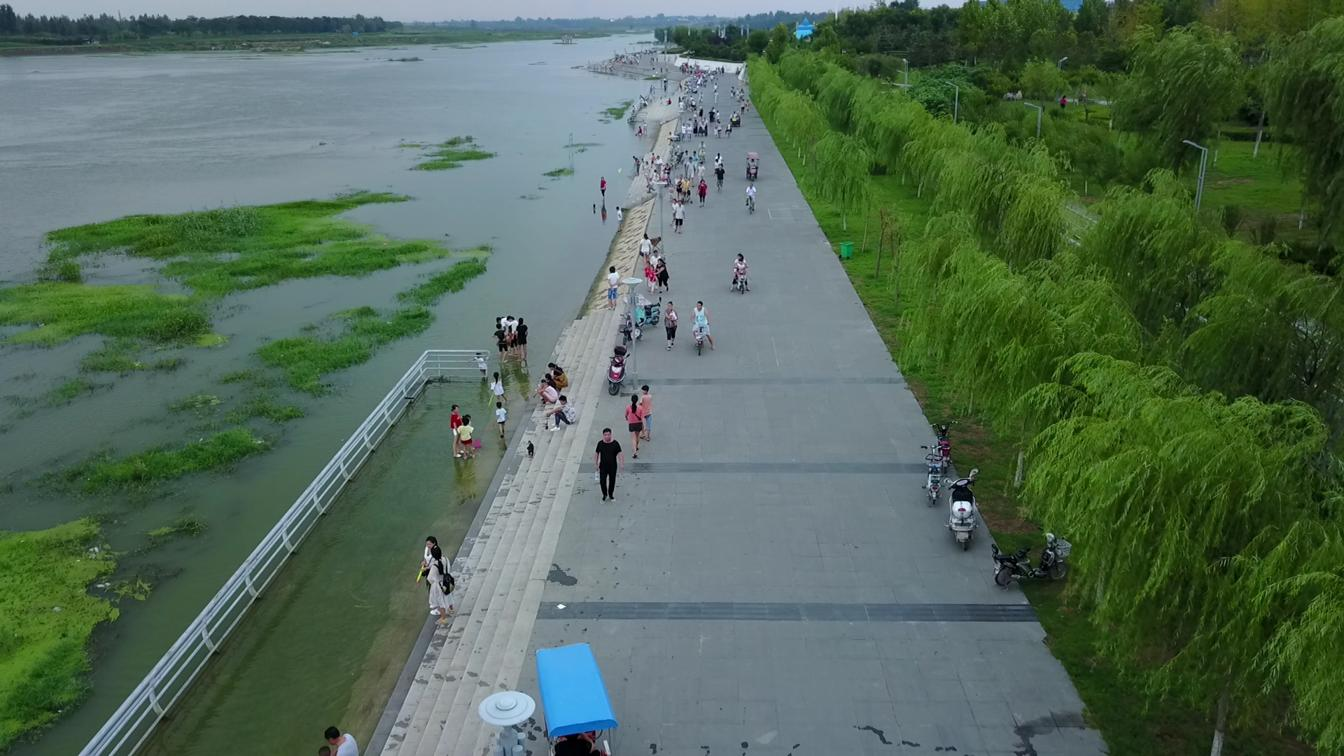

In [8]:
Image.open(temp['image'][0])

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169359 entries, 0 to 1169358
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   frame_index  1169359 non-null  int32 
 1   target_id    1169359 non-null  int32 
 2   x            1169359 non-null  int32 
 3   y            1169359 non-null  int32 
 4   w            1169359 non-null  int32 
 5   h            1169359 non-null  int32 
 6   score        1169359 non-null  int32 
 7   class        1169359 non-null  int32 
 8   truncation   1169359 non-null  int32 
 9   occlusion    1169359 non-null  int32 
 10  image        1169359 non-null  object
 11  bbox         1169359 non-null  object
 12  dir_name     1169359 non-null  object
dtypes: int32(10), object(3)
memory usage: 71.4+ MB


In [10]:
temp.describe()

frame_index     target_id             x             y             w   
count  1.169359e+06  1.169359e+06  1.169359e+06  1.169359e+06  1.169359e+06  \
mean   2.665551e+02  9.569808e+01  9.244905e+02  4.847161e+02  6.626735e+01   
std    2.254812e+02  8.595511e+01  5.136006e+02  3.017147e+02  6.573242e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00   
25%    9.700000e+01  3.400000e+01  5.450000e+02  2.600000e+02  2.800000e+01   
50%    2.100000e+02  7.100000e+01  8.930000e+02  4.440000e+02  4.600000e+01   
75%    3.680000e+02  1.310000e+02  1.257000e+03  6.720000e+02  8.100000e+01   
max    1.424000e+03  5.090000e+02  2.701000e+03  1.524000e+03  1.453000e+03   

                  h         score         class    truncation     occlusion  
count  1.169359e+06  1.169359e+06  1.169359e+06  1.169359e+06  1.169359e+06  
mean   5.911694e+01  9.454034e-01  3.776846e+00  4.075395e-02  4.823634e-01  
std    3.926369e+01  2.271912e-01  2.634079e+00  1.977198e-01  5.920102e-01  
min    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.500000e+01  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  
50%    4.900000e+01  1.000000e+00  4.000000e+00  0.000000e+00  0.000000e+00  
75%    7.100000e+01  1.000000e+00  4.000000e+00  0.000000e+00  1.000000e+00  
max    7.580000e+02  1.000000e+00  1.100000e+01  1.000000e+00  2.000000e+00

## Class별 분포 조사

In [11]:
class2name = {
    0:"background",
    1:"pedestrian",
    2:"people",
    3:"bicycle",
    4:"car",
    5:"van",
    6:"truck",
    7:"tricycle",
    8:"awning-tricycle",
    9:"bus",
    10:"motor",
    11:"others"
}
temp['class'] = temp['class'].map(class2name)

In [12]:
temp['class'].value_counts().sort_index()

class
awning-tricycle     13011
background          62369
bicycle             40255
bus                  9653
car                505301
motor              102819
others               1474
pedestrian         234305
people              94396
tricycle            28338
truck               30498
van                 46940
Name: count, dtype: int64

* 일반 승용차인 car의 개수가 505301개로 압도적으로 많았고, 이외에도 truck, van을 비롯한 차량의 개수가 많았습니다.
* 보행자 pedestrian의 수도 234305 로 많았습니다. 
* 대부분 차량과 사람으로 이루어진 것을 알 수 있습니다. 

c:\Users\jhy42\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jhy42\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jhy42\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jhy42\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jhy42\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  f

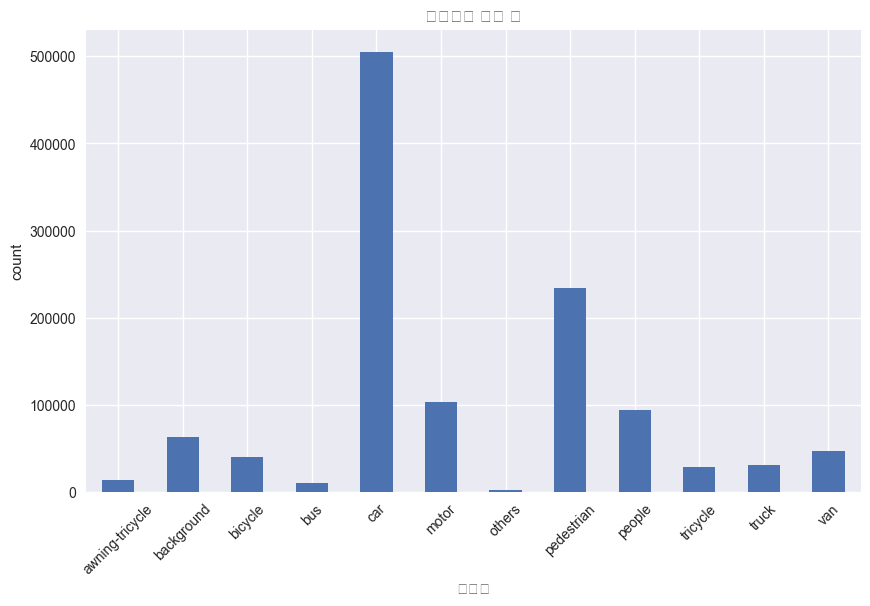

In [13]:
# 클래스별 객체 수 시각화
object_counts = temp['class'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
object_counts.plot(kind='bar')
plt.title('클래스별 객체 수')
plt.xlabel('클래스')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

* 각 프레임별 Object 수는 적게는 10개 미만에서 크게는 3000여개로 다양한 분포를 보이고 있습니다. 

### Video 별 Object 수

In [14]:
# 비디오당 객체 개수 계산
object_counts = temp.groupby('dir_name').size()

# 결과 출력
for image_id, count in object_counts.items():
    print(f"Image {image_id}: {count} objects")

Image uav0000013_00000_v: 8614 objects
Image uav0000013_01073_v: 1121 objects
Image uav0000013_01392_v: 2969 objects
Image uav0000020_00406_v: 10182 objects
Image uav0000071_03240_v: 6050 objects
Image uav0000072_04488_v: 9382 objects
Image uav0000072_05448_v: 10490 objects
Image uav0000072_06432_v: 9045 objects
Image uav0000076_00720_v: 7114 objects
Image uav0000079_00480_v: 12682 objects
Image uav0000084_00000_v: 30187 objects
Image uav0000099_02109_v: 10261 objects
Image uav0000124_00944_v: 50300 objects
Image uav0000126_00001_v: 61223 objects
Image uav0000138_00000_v: 32163 objects
Image uav0000140_01590_v: 15701 objects
Image uav0000143_02250_v: 17941 objects
Image uav0000145_00000_v: 3450 objects
Image uav0000150_02310_v: 38559 objects
Image uav0000218_00001_v: 1378 objects
Image uav0000222_03150_v: 19119 objects
Image uav0000239_03720_v: 15977 objects
Image uav0000239_12336_v: 12150 objects
Image uav0000243_00001_v: 19371 objects
Image uav0000244_01440_v: 45058 objects
Image uav

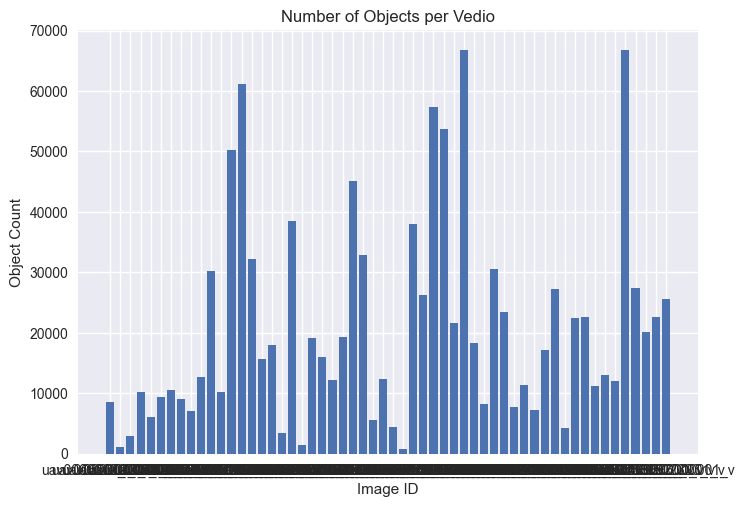

In [15]:
# 그래프 그리기
plt.bar(object_counts.index, object_counts.values)
plt.xlabel('Image ID')
plt.ylabel('Object Count')
plt.title('Number of Objects per Vedio')
plt.show()

### Frame 단위 class 분포

In [16]:
# 각 이미지에 대한 고유한 클래스 개수 계산
unique_classes_per_image = temp.groupby('frame_index')['class'].nunique()

# 결과 출력
for image_id, count in unique_classes_per_image.items():
    print(f"Image {image_id}: {count} unique classes")

Image 1: 12 unique classes
Image 2: 12 unique classes
Image 3: 12 unique classes
Image 4: 12 unique classes
Image 5: 12 unique classes
Image 6: 12 unique classes
Image 7: 12 unique classes
Image 8: 12 unique classes
Image 9: 12 unique classes
Image 10: 12 unique classes
Image 11: 12 unique classes
Image 12: 12 unique classes
Image 13: 12 unique classes
Image 14: 12 unique classes
Image 15: 12 unique classes
Image 16: 12 unique classes
Image 17: 12 unique classes
Image 18: 12 unique classes
Image 19: 12 unique classes
Image 20: 12 unique classes
Image 21: 12 unique classes
Image 22: 12 unique classes
Image 23: 12 unique classes
Image 24: 12 unique classes
Image 25: 12 unique classes
Image 26: 12 unique classes
Image 27: 12 unique classes
Image 28: 12 unique classes
Image 29: 12 unique classes
Image 30: 12 unique classes
Image 31: 12 unique classes
Image 32: 12 unique classes
Image 33: 12 unique classes
Image 34: 12 unique classes
Image 35: 12 unique classes
Image 36: 12 unique classes
I

C:\Users\jhy42\AppData\Local\Temp\ipykernel_13060\1117339095.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bar_colors = plt.cm.get_cmap('plasma')(range(len(unique_classes_per_image)))


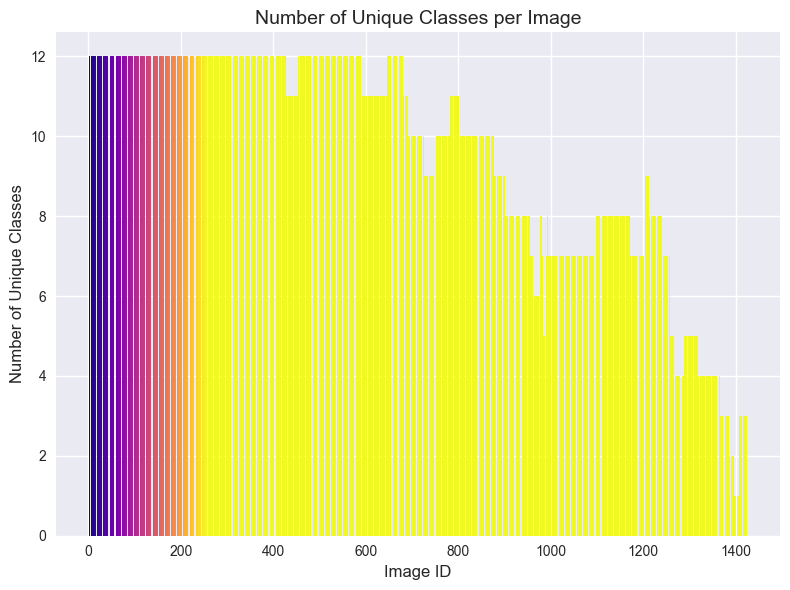

In [21]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))
bar_colors = plt.cm.get_cmap('plasma')(range(len(unique_classes_per_image)))
ax.bar(unique_classes_per_image.index, unique_classes_per_image.values, color=bar_colors)
ax.set_xlabel('Image ID', fontsize=12)
ax.set_ylabel('Number of Unique Classes', fontsize=12)
ax.set_title('Number of Unique Classes per Image', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

* Frame 별 class 는 최소 1개에서 최대 12개까지 포함하고 있습니다. 

### Video 별 class 분포

In [20]:
# 각 비디오에 대한 고유한 클래스 개수 계산
unique_classes_per_video = temp.groupby('dir_name')['class'].nunique()

# 결과 출력
for video_id, count in unique_classes_per_video.items():
    print(f"Video {image_id}: {count} unique classes")

Video 1424: 7 unique classes
Video 1424: 5 unique classes
Video 1424: 6 unique classes
Video 1424: 6 unique classes
Video 1424: 8 unique classes
Video 1424: 9 unique classes
Video 1424: 9 unique classes
Video 1424: 8 unique classes
Video 1424: 7 unique classes
Video 1424: 7 unique classes
Video 1424: 5 unique classes
Video 1424: 3 unique classes
Video 1424: 8 unique classes
Video 1424: 9 unique classes
Video 1424: 8 unique classes
Video 1424: 9 unique classes
Video 1424: 11 unique classes
Video 1424: 4 unique classes
Video 1424: 10 unique classes
Video 1424: 4 unique classes
Video 1424: 10 unique classes
Video 1424: 12 unique classes
Video 1424: 10 unique classes
Video 1424: 10 unique classes
Video 1424: 11 unique classes
Video 1424: 10 unique classes
Video 1424: 8 unique classes
Video 1424: 9 unique classes
Video 1424: 4 unique classes
Video 1424: 4 unique classes
Video 1424: 9 unique classes
Video 1424: 7 unique classes
Video 1424: 11 unique classes
Video 1424: 10 unique classes
Vide

C:\Users\jhy42\AppData\Local\Temp\ipykernel_13060\1568741958.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\jhy42\AppData\Local\Temp\ipykernel_13060\1568741958.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bar_colors = plt.cm.get_cmap('tab20c')(range(len(unique_classes_per_video)))


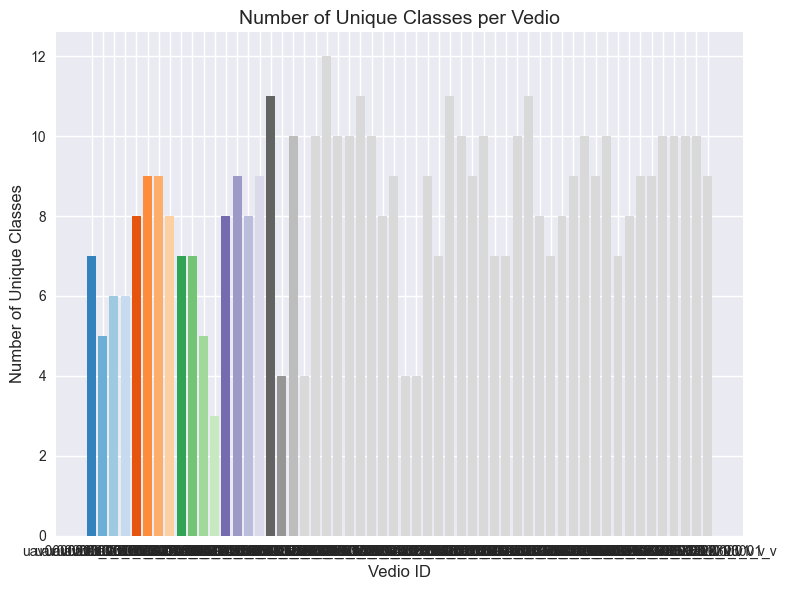

In [22]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))
bar_colors = plt.cm.get_cmap('tab20c')(range(len(unique_classes_per_video)))
ax.bar(unique_classes_per_video.index, unique_classes_per_video.values, color=bar_colors)
ax.set_xlabel('Vedio ID', fontsize=12)
ax.set_ylabel('Number of Unique Classes', fontsize=12)
ax.set_title('Number of Unique Classes per Vedio', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Score

Score 0 : 63843 
Score 1 : 1105516


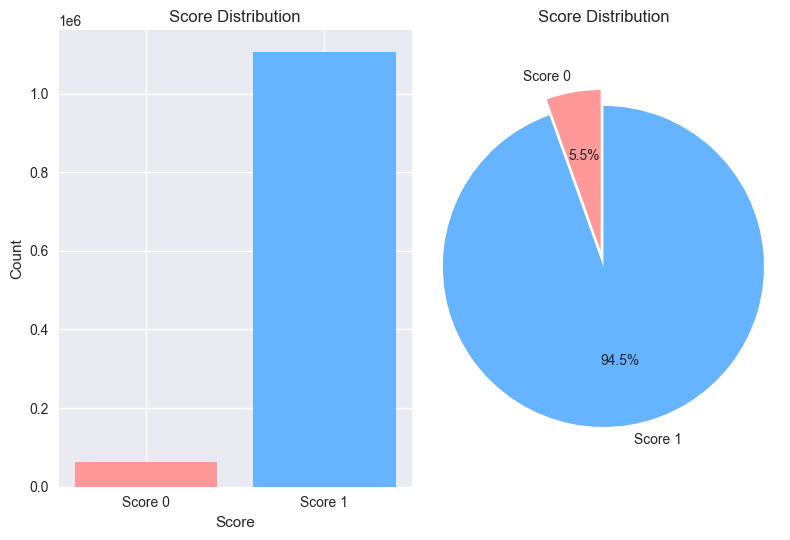

In [23]:
# score 값이 0인 데이터 추출
score_0 = temp[temp['score'] == 0]
count0_ = len(score_0)

# occlusion 값이 1인 데이터 추출
score_1 = temp[temp['score'] == 1]
count1_ = len(score_1)


# 바 차트 그리기
labels = ['Score 0', 'Score 1']
values = [count0_, count1_]

print(f'Score 0 : {count0_} \nScore 1 : {count1_}')
plt.subplot(1, 2, 1)  # 바 차트를 그릴 subplot 설정
plt.bar(labels, values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')

# 파이 차트 그리기
sizes = [count0_, count1_]
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)  # Score가 높은 데이터 항목을 약간 강조하기 위해 폭발 효과 추가

plt.subplot(1, 2, 2)  # 파이 차트를 그릴 subplot 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형 그래프 유지
plt.title('Score Distribution')

plt.tight_layout()  # subplot 간격 조정
plt.show()

* Score는 predicted bounding box의 신뢰도입니다.
* Score 값이 1이면 평가에 고려되는 bouding box, 0은 평가에서 무시되는 경계상자를 나타냅니다. 
* Score 0은 전체의 약 5.5% 정도만 차지하는 것을 알 수 있습니다. 

## Truncation

Truncation 0 : 1121703 
Truncation 1 : 47656


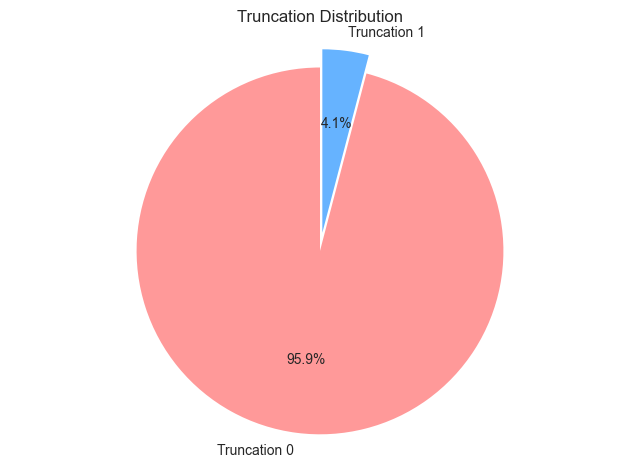

In [24]:
# truncation 값이 0인 데이터 추출
truncation_0 = temp[temp['truncation'] == 0]
count_0 = len(truncation_0)

# truncation 값이 1인 데이터 추출
truncation_1 = temp[temp['truncation'] == 1]
count_1 = len(truncation_1)

print(f'Truncation 0 : {count_0} \nTruncation 1 : {count_1}')
# 파이 차트 그리기
labels = ['Truncation 0', 'Truncation 1']
sizes = [count_0, count_1]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # 첫 번째 항목을 약간 강조하기 위해 폭발 효과 추가

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형 그래프 유지
plt.title('Truncation Distribution')
plt.show()

* Truncation은 Object가 Frame 밖으로 나가면 Truncation 1, Frame 안에 있으면 Truncation 0으로 나타냅니다. 
* 전체 Frame의 약 4.1% 의 Frame에서 이미지 밖으로 나와있는 Object가 발견되었습니다. 

## Occlusion

Occlusion 0 : 664231 
Occlusion 1 : 446200
Occlusion 2: 58928


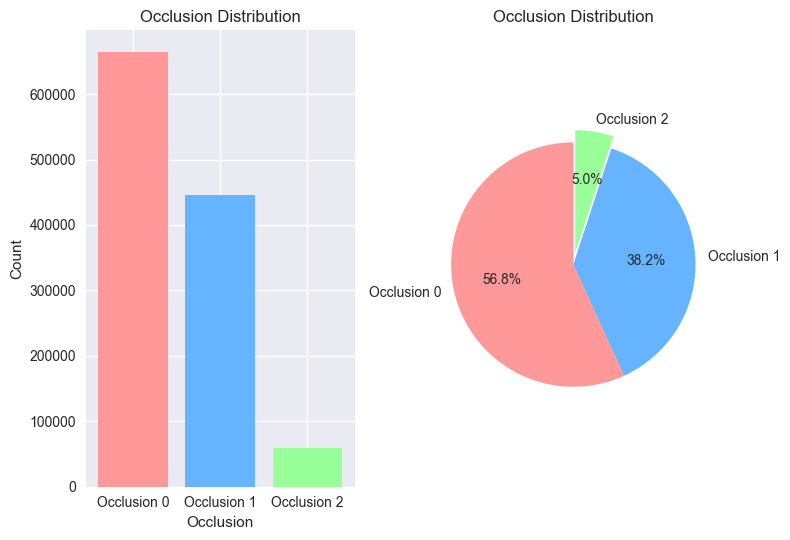

In [25]:
# occlusion 값이 0인 데이터 추출
occlusion_0 = temp[temp['occlusion'] == 0]
count0 = len(occlusion_0)

# occlusion 값이 1인 데이터 추출
occlusion_1 = temp[temp['occlusion'] == 1]
count1 = len(occlusion_1)

# occlusion 값이 2인 데이터 추출
occlusion_2 = temp[temp['occlusion'] == 2]
count2 = len(occlusion_2)

# 바 차트 그리기
labels = ['Occlusion 0', 'Occlusion 1', 'Occlusion 2']
values = [count0, count1, count2]

print(f'Occlusion 0 : {count0} \nOcclusion 1 : {count1}\nOcclusion 2: {count2}')
plt.subplot(1, 2, 1)  # 바 차트를 그릴 subplot 설정
plt.bar(labels, values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Occlusion Distribution')
plt.xlabel('Occlusion')
plt.ylabel('Count')

# 파이 차트 그리기
sizes = [count0, count1, count2]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0, 0, 0.1)  # Occlusion이 심한 데이터 항목을 약간 강조하기 위해 폭발 효과 추가

plt.subplot(1, 2, 2)  # 파이 차트를 그릴 subplot 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형 그래프 유지
plt.title('Occlusion Distribution')

plt.tight_layout()  # subplot 간격 조정
plt.show()

* Occlusion은 Object가 겹쳐서 가려진 정도를 의미합니다. Occlusion이 발생하지 않으면 0, 약간의 Occlusion이 발생하면 1, 심한 정도의 Occlusion이 발생하면 2로 나타냅니다. 
* 절반 이상의 56.8%의 Frame에서 Occlusion이 나타나지 않았고, 38.2%의 Frame에서는 약간의 Occlusion, 5.0% 의 Frame에서는 심한 정도의 Occlusion이 발생하였습니다. 

# Visualization

In [26]:
from PIL import Image, ImageDraw, ImageFont
temp['dir_name'] = data
temp

frame_index  target_id    x    y    w    h  score       class   
0                  1          0  593   43  174  190      0  background  \
1                  2          0  592   43  174  189      0  background   
2                  3          0  592   43  174  189      0  background   
3                  4          0  592   43  174  189      0  background   
4                  5          0  592   43  174  189      0  background   
...              ...        ...  ...  ...  ...  ...    ...         ...   
1169354          292        113  929  362  154   59      1         car   
1169355          293        113  928  364  154   58      1         car   
1169356          294        113  926  365  156   57      1         car   
1169357          295        113  925  367  156   55      1         car   
1169358          296        113  924  369  157   54      1         car   

         truncation  occlusion   
0                 0          0  \
1                 0          0   
2                 0          0   
3                 0          0   
4                 0          0   
...             ...        ...   
1169354           0          1   
1169355           0          1   
1169356           0          1   
1169357           0          1   
1169358           0          1   

                                                     image   
0        C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...  \
1        C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
2        C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
3        C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
4        C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
...                                                    ...   
1169354  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169355  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169356  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169357  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   
1169358  C:/Users/jhy42/Aiffel-project/Visdrone/VisDron...   

                        bbox            dir_name  
0        [593, 43, 174, 190]  uav0000013_00000_v  
1        [592, 43, 174, 189]  uav0000013_00000_v  
2        [592, 43, 174, 189]  uav0000013_00000_v  
3        [592, 43, 174, 189]  uav0000013_00000_v  
4        [592, 43, 174, 189]  uav0000013_00000_v  
...                      ...                 ...  
1169354  [929, 362, 154, 59]  uav0000366_00001_v  
1169355  [928, 364, 154, 58]  uav0000366_00001_v  
1169356  [926, 365, 156, 57]  uav0000366_00001_v  
1169357  [925, 367, 156, 55]  uav0000366_00001_v  
1169358  [924, 369, 157, 54]  uav0000366_00001_v  

[1169359 rows x 13 columns]

In [27]:
def visualize_all_bboxes_and_ID(image_path, bboxes, ids, scores):
    # 이미지 로드
    image = Image.open(image_path)

    # ImageDraw 객체 생성
    draw = ImageDraw.Draw(image)
    
    # 글자 크기 설정
    # font_size = 25
    # font = ImageFont.truetype("FreeSans.ttf", font_size)

    # bbox 시각화
    for bbox, obj_id, score in zip(bboxes, ids, scores):
        x, y, w, h = bbox
        draw.rectangle([x, y, x + w, y + h], outline=(0, 255, 0), width=2)
        text = f"ID: {obj_id}, Score: {score}"
        draw.text((x, y), text, fill=(255, 0, 0))

    # 이미지 표시
    plt.imshow(image)
    plt.show()


def visualize_scored_bboxes_and_ID(image_path, bboxes, ids, scores):
    # 이미지 로드
    image = Image.open(image_path)

    # ImageDraw 객체 생성
    draw = ImageDraw.Draw(image)
    
    # 글자 크기 설정
    # font_size = 25
    # font = ImageFont.truetype("FreeSans.ttf", font_size)

    # bbox 시각화
    for bbox, obj_id, score in zip(bboxes, ids, scores):
        if score == 0:
            continue
        x, y, w, h = bbox
        draw.rectangle([x, y, x + w, y + h], outline=(0, 255, 0), width=2)
        text = f"ID: {obj_id}, Score: {score}"
        draw.text((x, y), text, fill=(255, 0, 0))

    # 이미지 표시
    plt.imshow(image)

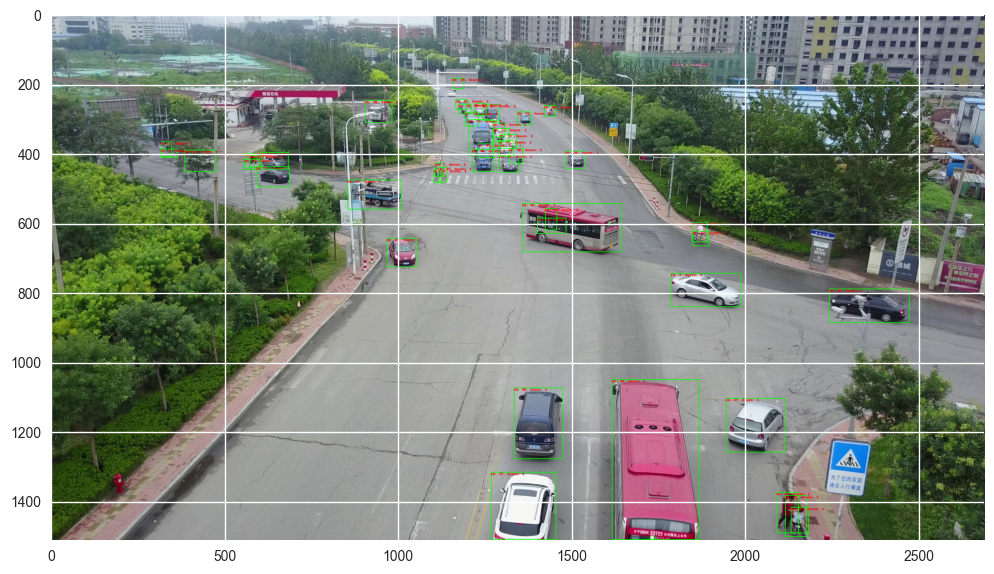

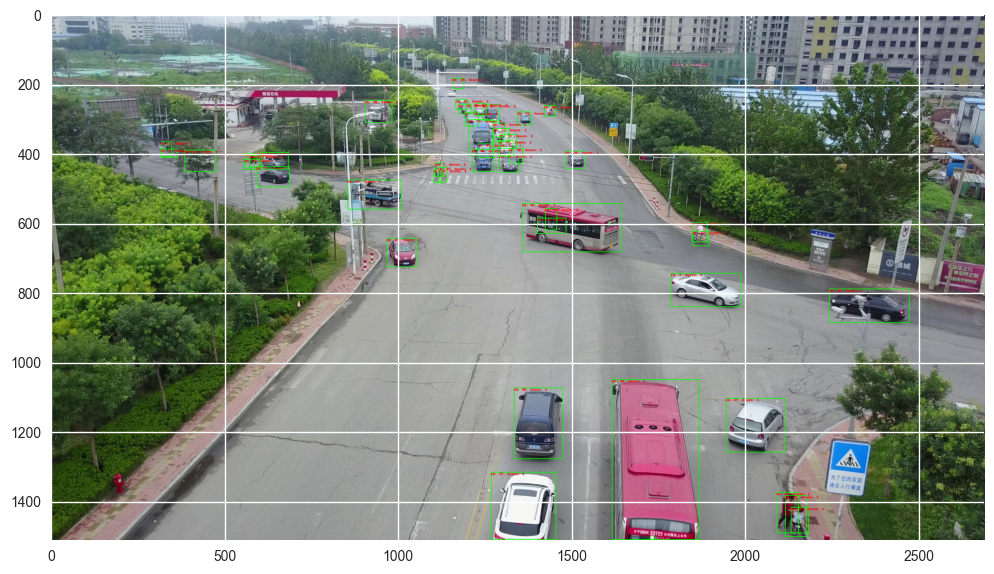

In [28]:
# 이미지 파일 경로 설정
image_path = temp.sample(1)['image'].values[0]

# bbox 좌표 설정 (xywh 형식)
bboxes = temp[temp['image'] == image_path]['bbox']
ids = temp[temp['image'] == image_path]['target_id']
scores = temp[temp['image'] == image_path]['score']

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
# Bounding Box 시각화
visualize_all_bboxes_and_ID(image_path, bboxes, ids, scores)

plt.figure(figsize=(15,15))
plt.subplot(2,1,2)
# Bounding Box 시각화
visualize_scored_bboxes_and_ID(image_path, bboxes, ids, scores)
plt.show()